In [1]:
import pandas as pd

In [2]:
matlab = [
    "$$$",
    "closed, versioning",
    "IDE = slow",
    "legacy packages",
    "weird indexing",
    "long to read",
    "scientific computing",
    "quick visualization",
    "only functions and scripts",
]
python = [
    "freeee",
    "open source, always supported",
    "only text = fast, low RAM",
    "community maintained - sometimes old formats not supported",
    "normal indexing",
    "short to read and write",
    "all purpose, less matrix capabilites --> numpy!",
    "jupyter notebook?",
    "object-oriented, package imports",
]
df = pd.DataFrame({"Matlab": matlab, "Python": python})
with pd.option_context("display.max_colwidth", None):
    display(df)

,Matlab,Python
0,$$$,freeee
1,"closed, versioning","open source, always supported"
2,IDE = slow,"only text = fast, low RAM"
3,legacy packages,community maintained - sometimes old formats not supported
4,weird indexing,normal indexing
5,long to read,short to read and write
6,scientific computing,"all purpose, less matrix capabilites --> numpy!"
7,quick visualization,jupyter notebook?
8,only functions and scripts,"object-oriented, package imports"


In [3]:
from numpy.fft import fftfreq

Python est un **langage** de programmation et peut être édité, exécuté depuis n'importe où. On a décidé qu'on utiliserait Spyder pour l'IDE et la visualisation, mais chacun est libre.

Il y a "peu" de fonctions de base et il faut généralement importer des **packages** spécifiques au début du script/notebook. Par exemple pour **numpy**, qui gère le calcul matriciel et vectoriel, et **matplotlib** qui gère les plots:
```python
import numpy
import matplotlib.pyplot as plt
from numpy.fft import fftfreq as fourier
 ```

La plupart des fonctions ont une documentation très précise, et une gestion des erreurs qui aide au débuggage. 

In [4]:
from numpy.fft import fftfreq as fourier

?fourier

Signature: fourier(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 , ..., -3.75, -2.5 , -1.25])
F

In [5]:
import kilosort

?kilosort.run_kilosort

Signature:
kilosort.run_kilosort(
    settings,
    probe=None,
    probe_name=None,
    filename=None,
    data_dir=None,
    file_object=None,
    results_dir=None,
    data_dtype=None,
    do_CAR=True,
    invert_sign=False,
    device=None,
    progress_bar=None,
    save_extra_vars=False,
    clear_cache=False,
    save_preprocessed_copy=False,
    bad_channels=None,
    verbose_console=False,
)
Docstring:
Run full spike sorting pipeline on specified data.

Parameters
----------
settings : dict
    Specifies a number of configurable parameters used throughout the
    spike sorting pipeline. See `kilosort/parameters.py` for a full list of
    available parameters.
    NOTE: `n_chan_bin` must be specified here, but all other settings are
          optional.
probe : dict; optional.
    A Kilosort4 probe dictionary, as returned by `kilosort.io.load_probe`.
probe_name : str; optional.
    Filename of probe to use, within the default `PROBE_DIR`. Only include
    the filename without an

On peut exécuter Python soit dans un script `.py` soit dans un notebook comme ici, qui aide à visualiser et est aussi interactif que Matlab. 
On peut rapidement modifier les figures et les enregister.

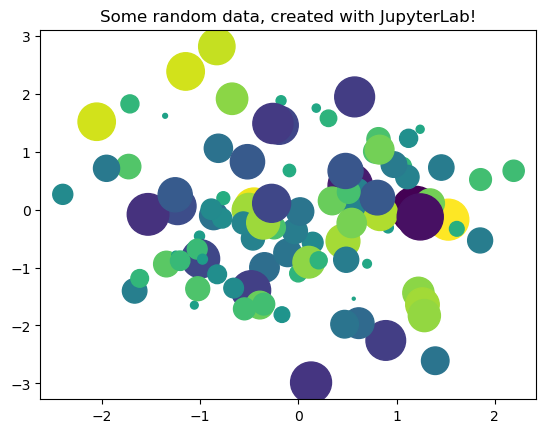

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale) * 500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

Package maintained by Diba Lab, very good support for Neuroscope type of data - but requires `.eeg` files.
Does not work for now.

In [7]:
%matplotlib widget
from ipywidgets import *

In [8]:
# Generate 100 random data points along 3 dimensions
def generate_random_data(n_clusters=100):
    x, y, scale = np.random.randn(3, n_clusters)
    fig, ax = plt.subplots()

    # Map each onto a scatterplot we'll create with Matplotlib
    ax.scatter(x=x, y=y, c=scale, s=np.abs(scale) * 500)
    ax.set(title="même interactif!")
    plt.show()


interact(generate_random_data, n_clusters=(1, 500, 1))

interactive(children=(IntSlider(value=100, description='n_clusters', max=500, min=1), Output()), _dom_classes=…

<function __main__.generate_random_data(n_clusters=100)>

# Neurophysiology data visualization - alternatives à Neuroscope ?

## Importation du viewer - soit comme package python soit comme application

In [1]:
import ephyviewer
import numpy as np
from pathlib import Path

import spikeinterface as si
import spikeinterface.extractors as se

import spikeinterface.preprocessing as spre
import spikeinterface.postprocessing as spost
import spikeinterface.curation as scur
import spikeinterface.widgets as sw
import spikeinterface.qualitymetrics
import os

si.set_global_job_kwargs(n_jobs=-1, progress_bar=True)

## Visualisation d'un enregistrement du nas 5

In [2]:
base_folder = Path(
    "/media/nas8/OB_ferret_AG_BM/Shropshire/freely-moving/20241205_TORCs/"
)

In [3]:
# conditionnement aversif
recording = se.NeuroScopeRecordingExtractor(
    os.path.join(base_folder, "M4_20241205_Shropshire_20241205_fm_TORCs.dat")
)

In [4]:
# Objet Python de Classe NeuroScopeRecordingExtractor
recording

NeuroScopeRecordingExtractor: 113 channels - 30.0kHz - 1 segments - 456,321,792 samples 
                              15,210.73s (4.23 hours) - int16 dtype - 96.05 GiB
  file_path: /media/nas8/OB_ferret_AG_BM/Shropshire/freely-moving/20241205_TORCs/M4_20241205_Shropshire_20241205_fm_TORCs.dat

In [35]:
recording.get_channel_groups() == 3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [36]:
channel_sliced_recording = recording.select_channels(
    channel_ids=recording.get_channel_ids()[recording.get_channel_groups() == 3]
)

In [38]:
# Hérite automatiquement des propriétés neuroscope comme les groupes de channel (HPC, OB, bruit...)
channel_sliced_recording.get_num_channels()

51

In [39]:
recording = channel_sliced_recording

In [40]:
recording

ChannelSliceRecording: 51 channels - 30.0kHz - 1 segments - 456,321,792 samples 
                       15,210.73s (4.23 hours) - int16 dtype - 43.35 GiB

In [42]:
# ajout dummy probe pour la visualisation
from probeinterface import generate_linear_probe

num_elec = recording.get_num_channels()
probe = generate_linear_probe(
    num_elec=num_elec,
    ypitch=20,
    contact_shapes="circle",
    contact_shape_params={"radius": 6},
)
probe.set_device_channel_indices(np.arange(num_elec))
recording = recording.set_probe(probe)

In [43]:
recording.get_channel_ids()

array(['32', '33', '34', '35', '36', '37', '38', '39', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '70', '71', '72', '79', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95'], dtype='<U64')

In [44]:
recording

ChannelSliceRecording: 51 channels - 30.0kHz - 1 segments - 456,321,792 samples 
                       15,210.73s (4.23 hours) - int16 dtype - 43.35 GiB

In [45]:
recording.get_channel_ids()

array(['32', '33', '34', '35', '36', '37', '38', '39', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '70', '71', '72', '79', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95'], dtype='<U64')

In [60]:
import spikeinterface.full as sf

In [104]:
# Sorting fait hier sur chaque groupe indépendant.
sorter_names = ["kilosort2_5", "ironclust"]

In [105]:
from spikeinterface.sorters import installed_sorters, available_sorters

installed_sorters()

['ironclust',
 'kilosort2_5',
 'kilosort4',
 'mountainsort5',
 'simple',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2']

### Available sorters

- HerdingSpikes2 run_sorter(sorter_name='herdingspikes')
- IronClust run_sorter(sorter_name='ironclust')
- Kilosort run_sorter(sorter_name='kilosort')
- Kilosort2 run_sorter(sorter_name='kilosort2')
- Kilosort2.5 run_sorter(sorter_name='kilosort2_5')
- Kilosort3 run_sorter(sorter_name='kilosort3')
- PyKilosort run_sorter(sorter_name='pykilosort')
- Klusta run_sorter(sorter_name='klusta')
- Mountainsort4 run_sorter(sorter_name='mountainsort4')
- Mountainsort5 run_sorter(sorter_name='mountainsort5')
- SpyKING Circus run_sorter(sorter_name='spykingcircus')
- Tridesclous run_sorter(sorter_name='tridesclous')
- Wave clus run_sorter(sorter_name='waveclus')
- Combinato run_sorter(sorter_name='combinato')
- HDSort run_sorter(sorter_name='hdsort')
- YASS run_sorter(sorter_name='yass')
- Spyking Circus2 run_sorter(sorter_name='spykingcircus2')
- Tridesclous2 run_sorter(sorter_name='tridesclous2')


In [106]:
from spikeinterface.sorters import Kilosort2_5Sorter, IronClustSorter

In [107]:
Kilosort2_5Sorter.set_kilosort2_5_path("/home/mickey/Documents/Theotime/Kilosort/")

Setting KILOSORT2_5_PATH environment variable for subprocess calls to: /home/mickey/Documents/Theotime/Kilosort


In [109]:
IronClustSorter.set_ironclust_path("/home/mickey/Documents/Theotime/ironclust/")

Setting IRONCLUST_PATH environment variable for subprocess calls to: /home/mickey/Documents/Theotime/ironclust


In [111]:
installed_sorters()

['ironclust',
 'kilosort2_5',
 'kilosort4',
 'mountainsort5',
 'simple',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2']

In [112]:
sf.get_default_sorter_params("kilosort2_5")

{'detect_threshold': 6,
 'projection_threshold': [10, 4],
 'preclust_threshold': 8,
 'whiteningRange': 32.0,
 'momentum': [20.0, 400.0],
 'car': True,
 'minFR': 0.1,
 'minfr_goodchannels': 0.1,
 'nblocks': 5,
 'sig': 20,
 'freq_min': 150,
 'sigmaMask': 30,
 'lam': 10.0,
 'nPCs': 3,
 'ntbuff': 64,
 'nfilt_factor': 4,
 'NT': None,
 'AUCsplit': 0.9,
 'do_correction': True,
 'wave_length': 61,
 'keep_good_only': False,
 'skip_kilosort_preprocessing': False,
 'scaleproc': None,
 'save_rez_to_mat': False,
 'delete_tmp_files': ('matlab_files',),
 'delete_recording_dat': False,
 'n_jobs': -1,
 'chunk_duration': '1s',
 'progress_bar': True,
 'mp_context': None,
 'max_threads_per_process': 1}

In [113]:
sf.get_default_sorter_params("ironclust")

{'detect_sign': -1,
 'adjacency_radius': 50,
 'adjacency_radius_out': 100,
 'detect_threshold': 3.5,
 'prm_template_name': '',
 'freq_min': 300,
 'freq_max': 8000,
 'merge_thresh': 0.985,
 'pc_per_chan': 9,
 'whiten': False,
 'filter_type': 'bandpass',
 'filter_detect_type': 'none',
 'common_ref_type': 'trimmean',
 'batch_sec_drift': 300,
 'step_sec_drift': 20,
 'knn': 30,
 'min_count': 30,
 'fGpu': True,
 'fft_thresh': 8,
 'fft_thresh_low': 0,
 'nSites_whiten': 16,
 'feature_type': 'gpca',
 'delta_cut': 1,
 'post_merge_mode': 1,
 'sort_mode': 1,
 'fParfor': False,
 'filter': True,
 'clip_pre': 0.25,
 'clip_post': 0.75,
 'merge_thresh_cc': 1,
 'nRepeat_merge': 3,
 'merge_overlap_thresh': 0.95,
 'version': 2,
 'n_jobs': -1,
 'chunk_duration': '1s',
 'progress_bar': True,
 'mp_context': None,
 'max_threads_per_process': 1}

In [114]:
recording

ChannelSliceRecording: 51 channels - 30.0kHz - 1 segments - 456,321,792 samples 
                       15,210.73s (4.23 hours) - int16 dtype - 43.35 GiB

In [122]:
import spikeinterface.sorters as ss

In [132]:
Out

{4: NeuroScopeRecordingExtractor: 113 channels - 30.0kHz - 1 segments - 456,321,792 samples 
                               15,210.73s (4.23 hours) - int16 dtype - 96.05 GiB
   file_path: /media/nas8/OB_ferret_AG_BM/Shropshire/freely-moving/20241205_TORCs/M4_20241205_Shropshire_20241205_fm_TORCs.dat,
 5: array([0, 0, 0, 5, 0, 0, 6, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 4,
        4, 4, 0, 0, 0, 0, 0, 0, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9,
        9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 9, 9, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8,
        8, 8, 8]),
 13: array([ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         8

In [135]:
# run sorter (if not already done)
sortings = {}
for sorter_name in sorter_names:
    output_folder = base_folder / f"{sorter_name}_output"
    print(sorter_name, output_folder)
    if output_folder.exists():
        sortings[sorter_name] = sf.read_sorter_folder(output_folder)
    else:
        sortings[sorter_name] = sf.run_sorter_by_property(
            sorter_name=sorter_name,
            recording=recording,
            grouping_property="channel_names",
            folder=output_folder,
            verbose=True,
            engine="joblib",
        )

kilosort2_5 /media/nas8/OB_ferret_AG_BM/Shropshire/freely-moving/20241205_TORCs/kilosort2_5_output


write_binary_recording:  57%|#####7    | 8680/15211 [14:47<11:07,  9.78it/s]



write_binary_recording:  57%|#####7    | 8680/15211 [14:47<11:07,  9.78it/s]

write_binary_recording:  57%|#####7    | 8680/15211 [14:47<11:07,  9.78it/s]



write_binary_recording:  57%|#####7    | 8680/15211 [14:47<11:07,  9.78it/s]

write_binary_recording:  57%|#####7    | 8680/15211 [14:47<11:07,  9.78it/s]







Process LokyProcess-116:
Process LokyProcess-119:
Process LokyProcess-105:
Process LokyProcess-114:
Process LokyProcess-103:
Process LokyProcess-109:
Process LokyProcess-115:
Process LokyProcess-100:
Process LokyProcess-101:
Process LokyProcess-104:
Traceback (most recent call last):
  File "/home/mickey/miniconda3/envs/neuroencoders/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/mickey/miniconda3/envs/neuroencoders/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mickey/mi

KeyboardInterrupt: 

call last):
  File "/home/mickey/Documents/Theotime/spikeinterface/src/spikeinterface/extractors/neoextractors/neobaseextractor.py", line 378, in get_traces
    raw_traces = self.neo_reader.get_analogsignal_chunk(
  File "/home/mickey/Documents/Theotime/spikeinterface/src/spikeinterface/sorters/basesorter.py", line 234, in setup_recording
    cls._setup_recording(recording, sorter_output_folder, sorter_params, verbose)
  File "/home/mickey/Documents/Theotime/python-neo/neo/rawio/baserawio.py", line 828, in get_analogsignal_chunk
    raw_chunk = self._get_analogsignal_chunk(block_index, seg_index, i_start, i_stop, stream_index, channel_indexes)
  File "/home/mickey/Documents/Theotime/spikeinterface/src/spikeinterface/sorters/external/kilosortbase.py", line 155, in _setup_recording
    write_binary_recording(
  File "/home/mickey/Documents/Theotime/spikeinterface/src/spikeinterface/core/recording_tools.py", line 151, in write_binary_recording
    executor.run()
  File "/home/mickey/minic

In [27]:
sortings

{'kilosort4': KiloSortSortingExtractor: 154 units - 1 segments - 20.0kHz,
 'spykingcircus2': NumpyFolder: 73 units - 1 segments - 20.0kHz,
 'klustakwik': NeuroScopeSortingExtractor: 57 units - 1 segments - 20.0kHz}

kilosort4
spykingcircus2
klustakwik


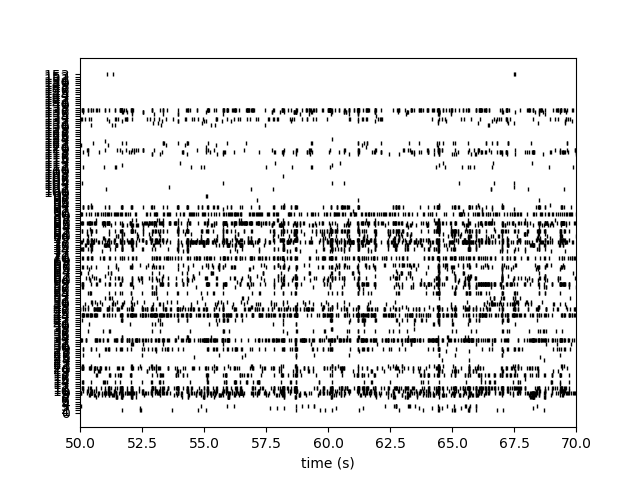

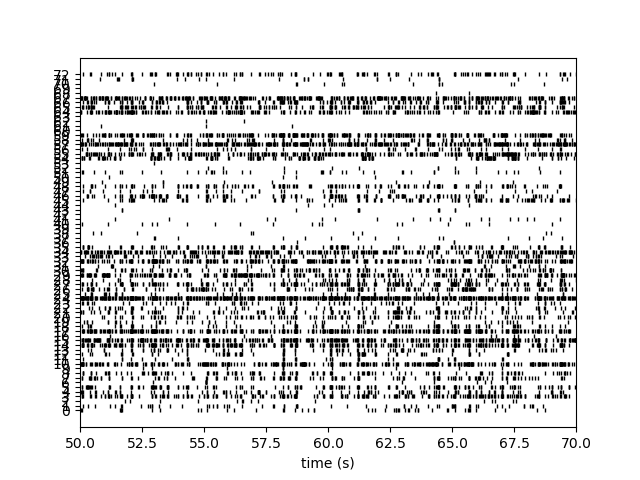

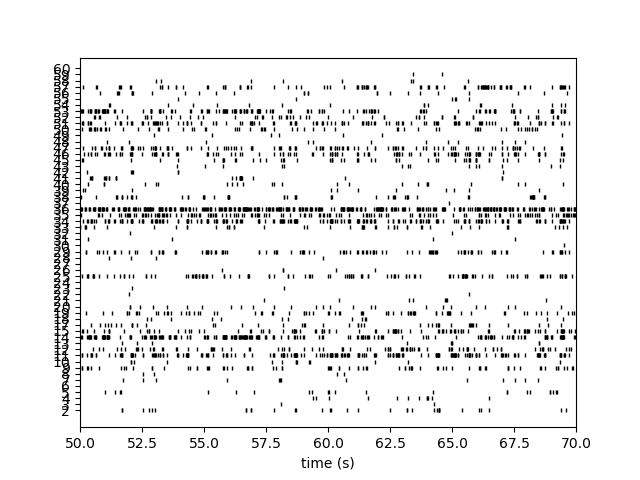

In [28]:
for sorter_name, sort in sortings.items():
    print(sorter_name)
    sf.plot_rasters(sort, time_range=(50.0, 70.0))

In [29]:
import spikeinterface.comparison as sc

In [30]:
sorter_names

['kilosort4', 'spykingcircus2', 'mountainsort5', 'klustakwik']

In [31]:
list(sortings.values())

[KiloSortSortingExtractor: 154 units - 1 segments - 20.0kHz,
 NumpyFolder: 73 units - 1 segments - 20.0kHz,
 NeuroScopeSortingExtractor: 57 units - 1 segments - 20.0kHz]

multi_comp = sc.compare_multiple_sorters(list(sortings.values()), sorter_names)
sw.plot_multicomparison_agreement(multi_comp)
sw.plot_multicomparison_agreement_by_sorter(multi_comp)

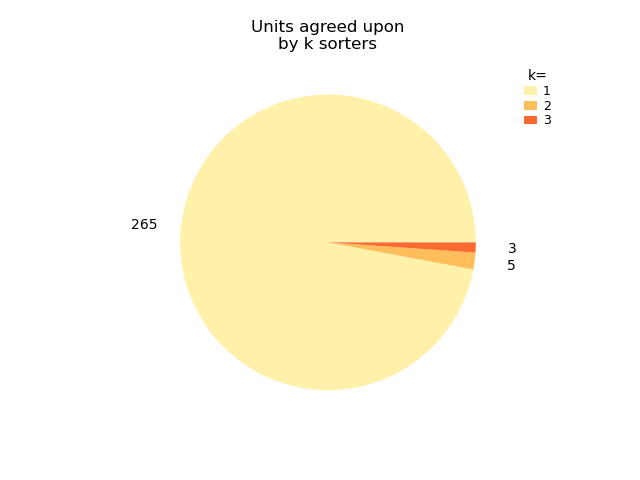

In [45]:
sw.plot_multicomparison_agreement(multi_comp)

In [ ]:
better_multi_comp = sc.compare_multiple_sorters(
    list(sortings.values()), ["kilosort4", "spykingcircus2", "klustakwik"]
)

In [50]:
multi_comp.get_agreement_sorting()

AgreementSortingExtractor: 273 units - 1 segments - 20.0kHz

In [32]:
already = False
try:
    analyzer = (
        si.load_sorting_analyzer(
            folder=os.path.join(base_folder, "klustakwik_analyzer"),
            load_extensions=True,
        ),
    )
    already = True
except Exception as e:
    analyzer = si.create_sorting_analyzer(sortings["klustakwik"], recording)

print(already)

estimate_sparsity:   0%|          | 0/20081 [00:00<?, ?it/s]

False


In [33]:
required_extensions = [
    "random_spikes",
    "waveforms",
    "templates",
    "noise_levels",
    "unit_locations",
    "template_similarity",
    "spike_amplitudes",
    "correlograms",
]
analyzer.compute(required_extensions)
analyzer

compute_waveforms:   0%|          | 0/20081 [00:00<?, ?it/s]

noise_level:   0%|          | 0/20 [00:00<?, ?it/s]

Compute : spike_amplitudes:   0%|          | 0/20081 [00:00<?, ?it/s]

SortingAnalyzer: 68 channels - 57 units - 1 segments - memory - sparse - has recording
Loaded 8 extensions: random_spikes, waveforms, templates, noise_levels, unit_locations, template_similarity, correlograms, spike_amplitudes

In [34]:
num_spikes = sortings["klustakwik"].count_num_spikes_per_unit()
unit_amplitudes = si.get_template_extremum_amplitude(analyzer)

analyzer.sorting.set_property("num_spikes", list(num_spikes.values()))
analyzer.sorting.set_property("amplitude", list(unit_amplitudes.values()))

In [37]:
analyzer_saved = analyzer.save_as(
    folder=os.path.join(base_folder, "klustakwik_analyzer2"), format="zarr"
)

In [38]:
analyzer_saved.compute(
    "principal_components", n_components=3, mode="by_channel_global", save=True
)
analyzer_saved.compute(
    "quality_metrics",
    metric_names=["snr", "amplitude_cutoff", "rp_violation"],
    save=True,
)
analyzer_saved

Fitting PCA:   0%|          | 0/57 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/57 [00:00<?, ?it/s]

/home/mickey/Documents/Theotime/spikeinterface/src/spikeinterface/qualitymetrics/quality_metric_calculator.py:206: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metrics.loc[non_empty_unit_ids, col] = pd.Series(res[i])


SortingAnalyzer: 68 channels - 57 units - 1 segments - zarr - sparse - has recording
Loaded 10 extensions: random_spikes, waveforms, templates, noise_levels, unit_locations, template_similarity, correlograms, spike_amplitudes, principal_components, quality_metrics

In [39]:
w = sw.plot_sorting_summary(
    analyzer_saved,
    unit_table_properties=["num_spikes", "amplitude"],
    curation=True,
    label_choices=["noise", "MUA", "SUA"],
    backend="sortingview",
)

https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://325b2d1fe74dcc77ec1b924806401b76c997ddff


In [40]:
%gui qt
w = sw.plot_sorting_summary(
    analyzer_saved,
    unit_table_properties=["num_spikes", "amplitude"],
    label_choices=["noise", "MUA", "SUA"],
    backend="spikeinterface_gui",
)

qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member fu

Seems to be implemented: visualize the video and/or position live in ephyviewer.

# Pynapple: a python tsd package

A regarder plus en détail, a l'air d'être un portage de Tsd + fonctions de lazy loading, tuning curves, signal viewer...

Surtout un wrapper numpy ?

# NeuroPy: a package managed by Diba lab

# OpenEphys

In [ ]:
from open_ephys.analysis import Session

directory = "/media/nas7/React_Passive_AG/OBG/Edel/Recordings/13052022/Edel_2022-05-13_09-09-55_m/Record_Node_101/experiment1/PostExp/continuous/Rhythm_FPGA-100.0"

import pyopenephys

file = pyopenephys.File(directory + "/continuous.dat")

need to change all our structure

## Neuropy

Not maintained anymore.